## 1. Import libraries, test data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## 2. Generate interpolation expected prediction values

The interpolated x-points should be the mean of the 2 points, and we assume (and expect) their respective y-values to be the mean of the 2 points y-values.

In [2]:
x_test = []
y_test = []

for i in range(0, len(x) - 1):
    x_test.append(((x[i] + x[i + 1]) / 2).tolist())
    y_test.append((y[i] + y[i + 1]) / 2)

## 3. Training the Random Forest Regression and single Decision Tree model 

Purpose to show the difference with using ensemble learning vs a single model

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

model = RandomForestRegressor()
model.fit(x, y)

model_single = DecisionTreeRegressor()
model_single.fit(x, y)

y_test_predicted = model.predict(x_test)
y_test_predicted_single = model_single.predict(x_test)

## 4. Display graph and details

The blue data points are the actual x-points with the true y-value, the red data points are the interpolated x-points predicted on the single decision tree, and the orange data points are the interpolated x-points predicted on the random forest. The red line represents the predicted value at the given x-point for the single decision tree and the orange line for the random forest.

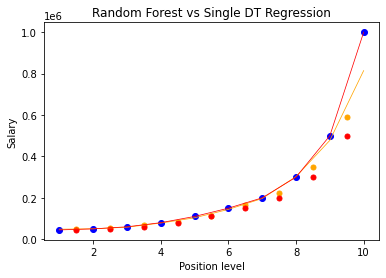

In [4]:
plt.scatter(x, y, color = 'blue')
plt.scatter(x_test, y_test_predicted, color='orange', s=25)
plt.scatter(x_test, y_test_predicted_single, color='red', s=25)

plt.plot(x, model.predict(x), color = 'orange', linewidth='0.75')
plt.plot(x, model_single.predict(x), color = 'red', linewidth='0.75')

plt.title('Random Forest vs Single DT Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## 5. Find errors in predicted interpolated data
Display the predicted y-value from interpolated x-points against the existing true x-points.

In [5]:
from itertools import zip_longest, chain

df = pd.DataFrame(chain(
        zip_longest(x_test, y_test, y_test_predicted, y_test_predicted_single, map(lambda _: 0, x_test)), 
        zip_longest(x, y, y, y, map(lambda _: 1, x))
    ), columns=['x-values', 'y-value', 'y-predicted-value-random-forest', 'y-predicted-value-single-dt', 'y-value-is-true'])
df['residual-epsilon-random-forest'] = (df['y-value'] - df['y-predicted-value-random-forest']).abs()
df['residual-epsilon-single-dt'] = (df['y-value'] - df['y-predicted-value-single-dt']).abs()
df.sort_values('x-values')

,x-values,y-value,y-predicted-value-random-forest,y-predicted-value-single-dt,y-value-is-true,residual-epsilon-random-forest,residual-epsilon-single-dt
9,[1],45000.0,45000.0,45000.0,1,0.0,0.0
0,[1.5],47500.0,48350.0,45000.0,0,850.0,2500.0
10,[2],50000.0,50000.0,50000.0,1,0.0,0.0
1,[2.5],55000.0,52300.0,50000.0,0,2700.0,5000.0
11,[3],60000.0,60000.0,60000.0,1,0.0,0.0
2,[3.5],70000.0,66600.0,60000.0,0,3400.0,10000.0
12,[4],80000.0,80000.0,80000.0,1,0.0,0.0
3,[4.5],95000.0,83200.0,80000.0,0,11800.0,15000.0
13,[5],110000.0,110000.0,110000.0,1,0.0,0.0
4,[5.5],130000.0,114100.0,110000.0,0,15900.0,20000.0
